In [17]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score


In [28]:
data = pd.read_excel("df.xlsx")
print(data.head(5))

         id diagnosis  Radius_mean  Texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         21.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [29]:
binary = {'M':1,'B':0}
data['diagnosis'] = data['diagnosis'].map(binary)
y = data['diagnosis']
X = data.drop('diagnosis', axis=1)
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Run Logistic regression with L1 penalty (Lasso)
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso.fit(X_train, y_train)

# Run Logistic regression with L2 penalty (Ridge)
ridge = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
ridge.fit(X_train, y_train)

# Predict test data
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Calculate Accuracy and Recall
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
recall_lasso = recall_score(y_test, y_pred_lasso)

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
recall_ridge = recall_score(y_test, y_pred_ridge)

print(f"Lasso Accuracy: {accuracy_lasso}")
print(f"Lasso Recall: {recall_lasso}")

print(f"Ridge Accuracy: {accuracy_ridge}")
print(f"Ridge Recall: {recall_ridge}")

Lasso Accuracy: 0.9736842105263158
Lasso Recall: 0.9767441860465116
Ridge Accuracy: 0.9736842105263158
Ridge Recall: 0.9534883720930233


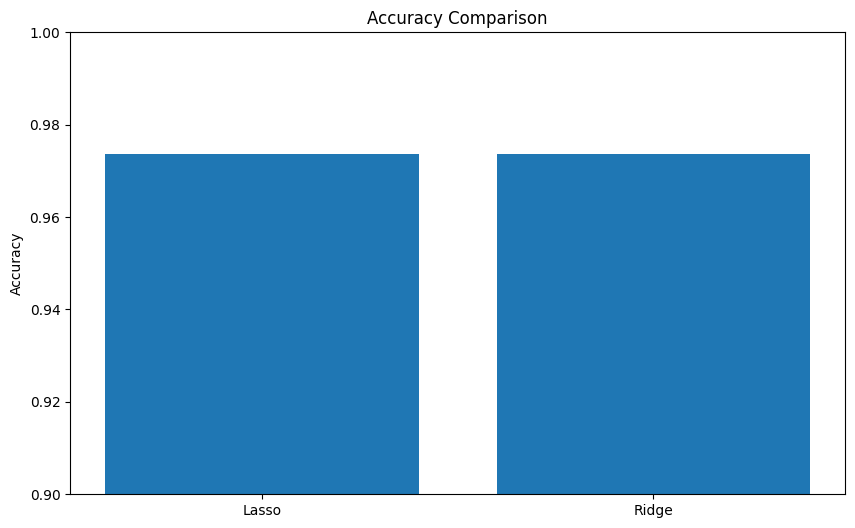

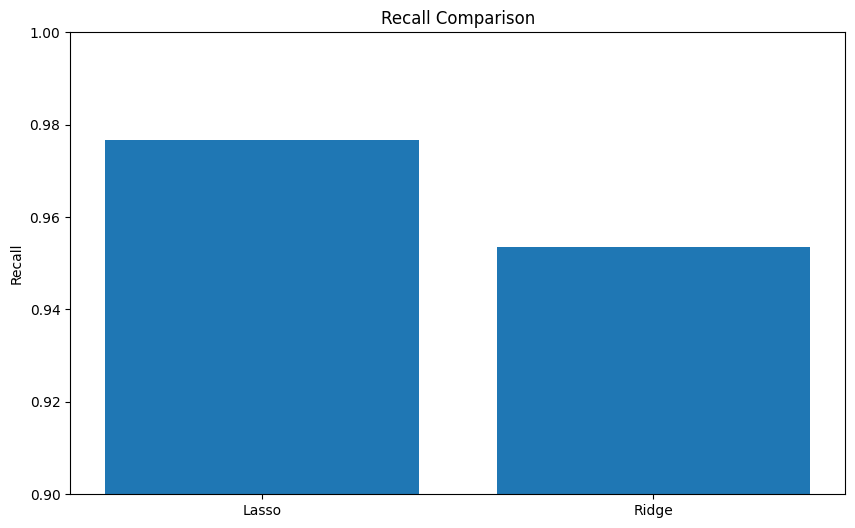

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(['Lasso', 'Ridge'], [accuracy_lasso, accuracy_ridge])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
plt.bar(['Lasso', 'Ridge'], [recall_lasso, recall_ridge])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.ylim([0.9, 1])
plt.show()

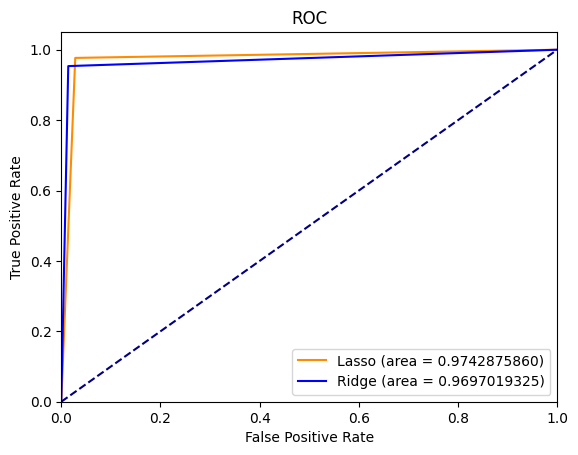

In [34]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve for Lasso
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_pred_lasso)
roc_auc_lasso = auc(fpr_lasso, tpr_lasso)

# Compute ROC curve for Ridge
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_pred_ridge)
roc_auc_ridge = auc(fpr_ridge, tpr_ridge)

plt.figure()
plt.plot(fpr_lasso, tpr_lasso, color='darkorange', label='Lasso (area = %0.10f)' % roc_auc_lasso)
plt.plot(fpr_ridge, tpr_ridge, color='blue', label='Ridge (area = %0.10f)' % roc_auc_ridge)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()